In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [39]:
#Loading original dataset
booking = pd.read_csv('census.csv')
df = booking[["age", "education.num","marital.status","occupation", "capital.gain","capital.loss","hours.per.week","native.country"]]

In [40]:
df['marital.status'] = LabelEncoder().fit_transform(df['marital.status'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['native.country'] = LabelEncoder().fit_transform(df['native.country'])
# label_encoder_marital = LabelEncoder()
# label_encoder_occupation = LabelEncoder()
# data["marital.status"] = label_encoder_marital.fit_transform(data["marital.status"])
# data["occupation"] = label_encoder_occupation.fit_transform(data["occupation"])

In [41]:
df

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country
0,90,9,6,0,0,4356,40,39
1,82,9,6,4,0,4356,18,39
2,66,10,6,0,0,4356,40,39
3,54,4,0,7,0,3900,40,39
4,41,10,5,10,0,3900,40,39
...,...,...,...,...,...,...,...,...
32556,22,10,4,11,0,0,40,39
32557,27,12,2,13,0,0,38,39
32558,40,9,2,7,0,0,40,39
32559,58,9,6,1,0,0,40,39


In [42]:
#Loading generated dataset
df2 = pd.read_csv('census2.csv')
df2['marital.status'] = LabelEncoder().fit_transform(df2['marital.status'])
df2['occupation'] = LabelEncoder().fit_transform(df2['occupation'])
df2['native.country'] = LabelEncoder().fit_transform(df2['native.country'])
df2

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country
0,45.0,17.0,4,18,100.0,0.0,100.0,0
1,44.0,100.0,5,8,20.0,0.0,95.0,6
2,43.0,100.0,5,8,20.0,0.0,95.0,6
3,42.0,100.0,5,8,20.0,0.0,95.0,6
4,41.0,100.0,5,8,20.0,0.0,95.0,6
...,...,...,...,...,...,...,...,...
9995,30.0,10.0,1,5,69.0,80.0,45.0,2
9996,30.0,10.0,1,5,69.0,79.0,44.0,2
9997,30.0,10.0,1,5,69.0,79.0,45.0,2
9998,30.0,10.0,1,5,69.0,78.0,44.0,2


In [43]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(df)
df2['is_inlier_IF'] = iso_forest.predict(df2)

In [44]:
inliers_IF = df2[df2['is_inlier_IF'] == 1]
outliers_IF = df2[df2['is_inlier_IF'] == -1]

In [45]:
outliers_IF

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF
0,45.0,17.0,4,18,100.0,0.0,100.0,0,-1
1,44.0,100.0,5,8,20.0,0.0,95.0,6,-1
2,43.0,100.0,5,8,20.0,0.0,95.0,6,-1
3,42.0,100.0,5,8,20.0,0.0,95.0,6,-1
4,41.0,100.0,5,8,20.0,0.0,95.0,6,-1
...,...,...,...,...,...,...,...,...,...
9995,30.0,10.0,1,5,69.0,80.0,45.0,2,-1
9996,30.0,10.0,1,5,69.0,79.0,44.0,2,-1
9997,30.0,10.0,1,5,69.0,79.0,45.0,2,-1
9998,30.0,10.0,1,5,69.0,78.0,44.0,2,-1


In [46]:
inliers_IF

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF


In [47]:
def is_inlier(row):
    # Age constraint: should be >17
    if  row['age'] < 17:
        return -1

    # Education number constraint: 1 < education.num < 16
    if row['education.num'] < 1 or row['education.num'] > 16:
        return -1

    # Capital gain constraint: capital.gain ≥ 0
    if row['capital.gain'] < 0:
        return -1

    # Capital loss constraint: capital.loss ≥ 0
    if row['capital.loss'] < 0:
        return -1

    # Hours per week constraint: 0 < hours.per.week < 168
    if row['hours.per.week'] < 0 or row['hours.per.week'] > 168:
        return -1

    # Occupation-specific constraint
    if row['occupation'] == "Armed-Forces" and row['workclass'] != "Federal-gov":
        return -1

    # Marital status and relationship constraint
    if row['marital.status'] == "Married-civ-spouse" and row['relationship'] == "Unmarried":
        return -1

    # If all constraints are satisfied, return True
    return 1

In [48]:
#Extracting and analysing through human-written constraints
df2['is_inlier_HW'] = df2.apply(is_inlier, axis=1)

In [49]:
inliers_HW = df2[df2['is_inlier_HW'] == 1]
outliers_HW = df2[df2['is_inlier_HW'] == -1]
outliers_HW

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF,is_inlier_HW
0,45.0,17.0,4,18,100.0,0.0,100.0,0,-1,-1
1,44.0,100.0,5,8,20.0,0.0,95.0,6,-1,-1
2,43.0,100.0,5,8,20.0,0.0,95.0,6,-1,-1
3,42.0,100.0,5,8,20.0,0.0,95.0,6,-1,-1
4,41.0,100.0,5,8,20.0,0.0,95.0,6,-1,-1
...,...,...,...,...,...,...,...,...,...,...
192,30.0,96.0,2,8,0.0,100.0,56.0,8,-1,-1
193,30.0,97.0,2,8,0.0,100.0,56.0,8,-1,-1
194,30.0,98.0,2,8,0.0,100.0,56.0,8,-1,-1
195,30.0,99.0,2,8,0.0,100.0,56.0,8,-1,-1


In [50]:
inliers_HW

,age,education.num,marital.status,occupation,capital.gain,capital.loss,hours.per.week,native.country,is_inlier_IF,is_inlier_HW
93,31.0,4.0,2,8,1.0,0.0,95.0,10,-1,1
94,32.0,4.0,2,8,1.0,0.0,95.0,10,-1,1
95,33.0,4.0,2,8,1.0,0.0,95.0,10,-1,1
96,34.0,4.0,2,8,1.0,0.0,95.0,10,-1,1
97,35.0,4.0,2,8,1.0,0.0,95.0,10,-1,1
...,...,...,...,...,...,...,...,...,...,...
9995,30.0,10.0,1,5,69.0,80.0,45.0,2,-1,1
9996,30.0,10.0,1,5,69.0,79.0,44.0,2,-1,1
9997,30.0,10.0,1,5,69.0,79.0,45.0,2,-1,1
9998,30.0,10.0,1,5,69.0,78.0,44.0,2,-1,1


In [51]:
#disagreements between two methods
df2['similar'] = abs(df2['is_inlier_IF'] + df2['is_inlier_HW']) / 2

In [52]:
mismatch = df2[df2['similar'] == 0]
similar = df2[df2['similar'] == 1]

In [53]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [54]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df2['is_inlier_HW'], df2['is_inlier_IF'])
conf_matrix

array([[ 178,    0],
       [9822,    0]])

Text(95.72222222222221, 0.5, 'Handwritten')

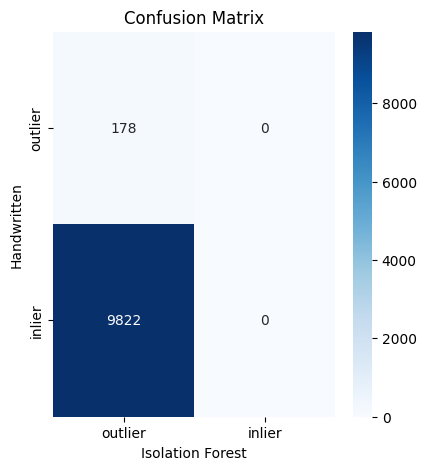

In [55]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [56]:
#Both agree it is inlier
all_inlier = df2[(df2['is_inlier_IF'] == 1) & (df2['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [57]:
#Both agree it is outlier
all_outlier = df2[(df2['is_inlier_IF'] == -1) & (df2['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")